In [1]:

import torch
import matplotlib.pyplot as plt
import json
from torch.optim import Adam
from utils.pipeline import forward, get_latent_mean_std, get_latent_from_text
from utils.similarity import CLIP_similarity, DINO_similarity

torch.cuda.empty_cache()

/home/schmid/miniconda3/envs/nphm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_path = '/home/schmid/data/validation_set.json'
with open(dataset_path, 'r') as json_file:
    data = json.load(json_file)

prompt = data['heads'][3]['description neutral']
CLIP_gt = data['heads'][3]['CLIP embedding']
DINO_gt = data['heads'][3]['DINO embedding']

/home/schmid/miniconda3/envs/nphm/lib/python3.9/site-packages/torch/profiler/profiler.py:403: UserWarning: use_cuda is deprecated, use activities argument instead
  warn("use_cuda is deprecated, use activities argument instead")
  0%|          | 0/120 [00:00<?, ?it/s]

/home/schmid/Text2Head/utils/pipeline.py:83: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  prob_score = -delta.T @ torch.inverse(cov) @ delta
100%|██████████| 120/120 [05:14<00:00,  2.62s/it]


best_CLIP_score tensor([[33.5281]])
best_prob_score tensor(-6.2610)


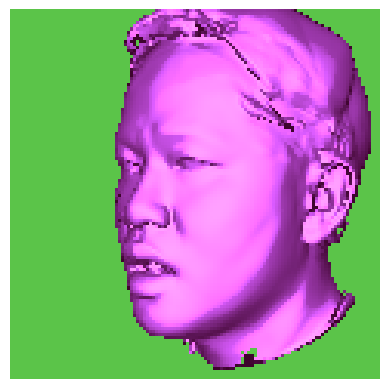

In [3]:
lat_mean, lat_std = get_latent_mean_std()
lat_rep = (torch.randn(lat_mean.shape) * lat_std * 0.85 + lat_mean).detach().requires_grad_(True)

hparams = {
        'resolution': 120,
        'n_iterations': 120,
        'optimizer_lr': 2e-4,
        'optimizer_weight_decay': 5e-5,
        'lr_scheduler_factor': 0.53,
        'lr_scheduler_patience': 5,
        'lr_scheduler_min_lr': 2.6e-6
    }

best_latent, best_CLIP_score, best_prob_score, hist = get_latent_from_text(prompt, hparams, CLIP_gt=CLIP_gt, DINO_gt=DINO_gt)
print('best_CLIP_score', best_CLIP_score)
print('best_prob_score', best_prob_score)

lat_rep = best_latent
'''
camera_params = {
        "camera_distance": 1.42,
        "camera_angle": 45.,
        "focal_length": 3.15,
        "max_ray_length": 3, #(0.5 + 1) * 3.15 + 1.5,
        # Image
        "resolution_y": 200,
        "resolution_x": 200
    }

phong_params = {
    "ambient_coeff": 0.67,
    "diffuse_coeff": 0.79,
    "specular_coeff": 0.3,  # 0.63,
    "shininess": 1.,
    # Colors
    "object_color": torch.tensor([0.61, 0.61, 0.61]),  # torch.tensor([0.63, 0.17, 0.78]),
    "background_color": torch.tensor([0., 0., 0.])  # torch.tensor([0.35, 0.94, 0.26])
}

light_params = {
    "amb_light_color": torch.tensor([0.57, 0.5, 0.69]),
    # light 1
    "light_intensity_1": 1.,  # 1.1,
    "light_color_1": torch.tensor([1., 1., 1.]),
    "light_dir_1": torch.tensor([-0.41, -0.51, -0.76]),
    # light p
    "light_intensity_p": 0.,
    "light_color_p": torch.tensor([0.88, 0.99, 0.74]),
    "light_pos_p": torch.tensor([2., 0., 2.])
}
'''
camera_params = {
    "camera_distance": 0.21,
    "camera_angle": 45.,
    "focal_length": 2.57,
    "max_ray_length": 3,
    # Image
    "resolution_y": hparams['resolution'],
    "resolution_x": hparams['resolution']
}
phong_params = {
    "ambient_coeff": 0.51,
    "diffuse_coeff": 0.75,
    "specular_coeff": 0.64,
    "shininess": 0.5,
    # Colors
    "object_color": torch.tensor([0.53, 0.24, 0.64]),
    "background_color": torch.tensor([0.36, 0.77, 0.29])
}

light_params = {
    "amb_light_color": torch.tensor([0.9, 0.16, 0.55]),
    # light 1
    "light_intensity_1": 1.42,
    "light_color_1": torch.tensor([0.8, 0.97, 0.89]),
    "light_dir_1": torch.tensor([-0.6, -0.4, -0.67]),
    # light p
    "light_intensity_p": 0.62,
    "light_color_p": torch.tensor([0.8, 0.97, 0.89]),
    "light_pos_p": torch.tensor([1.19, -1.27, 2.24])
}

with torch.no_grad():
    score_CLIP, score_prob, image = forward(lat_rep, "untextured render of a face", camera_params, phong_params, light_params)
plt.imshow(image.detach().numpy())
plt.axis('off')  # Turn off axes
#plt.savefig("../optim_img/6", bbox_inches='tight')
plt.show()

subject  017
CLIP:  tensor([[77.3750]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[88.2918]], device='cuda:0')
##########
subject  018
CLIP:  tensor([[87.1875]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[91.7979]], device='cuda:0')
##########
subject  019
CLIP:  tensor([[75.7500]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[92.2992]], device='cuda:0')
##########
subject  020
CLIP:  tensor([[75.1250]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[88.9839]], device='cuda:0')
##########
subject  022
CLIP:  tensor([[75.1875]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[92.9109]], device='cuda:0')
##########
subject  023
CLIP:  tensor([[83.6250]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[92.9597]], device='cuda:0')
##########
subject  024
CLIP:  tensor([[73.5625]], device='cuda:0', dtype=torch.float16)
DINO:  tensor([[90.7267]], device='cuda:0')
##########
subject  025
CLIP:  tensor([[77.6875]], device='cuda:0', dtype=torch.

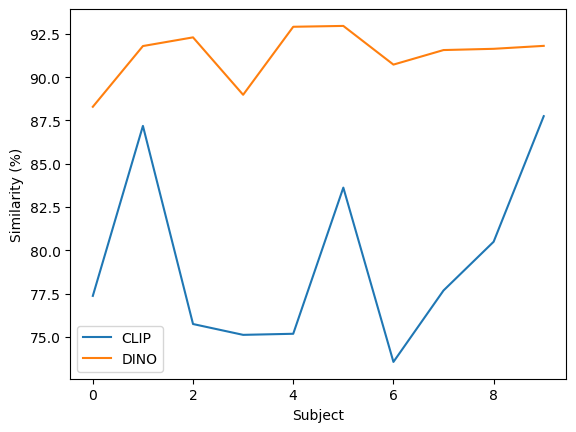

In [24]:
clip = []
dino = []

for entry in data['heads']:
    subject = entry['subject']
    clip_embedding = entry['CLIP embedding']
    dino_embedding = entry['DINO embedding']
    
    clip_sim = CLIP_similarity(image, clip_embedding)
    dino_sim = DINO_similarity(image, dino_embedding)
    clip.append(clip_sim)
    dino.append(dino_sim)

    print('subject ', subject)
    print('CLIP: ', clip_sim)
    print('DINO: ', dino_sim)
    print('##########')


plt.plot(torch.tensor(clip).numpy(), label='CLIP')
plt.plot(torch.tensor(dino).numpy(), label='DINO')

plt.xlabel('Subject')
plt.ylabel('Similarity (%)')
plt.legend()
plt.show()

In [ ]:
lat_mean, lat_std = get_latent_mean_std()
lat_rep = (torch.randn(lat_mean.shape) * lat_std * 0.85 + lat_mean).detach().requires_grad_(True)

In [ ]:
optimizer = Adam(params=[lat_rep],
                 lr=0.001, 
                 maximize=True)

In [ ]:
camera_params = {
        "camera_distance": 1.42,
        "camera_angle": -55.,
        "focal_length": 3.15,
        "max_ray_length": 3, #(0.5 + 1) * 3.15 + 1.5,
        # Image
        "resolution_y": 200,
        "resolution_x": 200
    }

phong_params = {
    "ambient_coeff": 0.67,
    "diffuse_coeff": 0.79,
    "specular_coeff": 0.3,  # 0.63,
    "shininess": 1.,
    # Colors
    "object_color": torch.tensor([0.61, 0.61, 0.61]),  # torch.tensor([0.63, 0.17, 0.78]),
    "background_color": torch.tensor([0., 0., 0.])  # torch.tensor([0.35, 0.94, 0.26])
}

light_params = {
    "amb_light_color": torch.tensor([0.57, 0.07, 0.69]),
    # light 1
    "light_intensity_1": 0.,  # 1.1,
    "light_color_1": torch.tensor([0.88, 0.99, 0.74]),
    "light_dir_1": torch.tensor([-0.41, -0.51, -0.76]),
    # light p
    "light_intensity_p": 1.,
    "light_color_p": torch.tensor([0.88, 0.99, 0.74]),
    "light_pos_p": torch.tensor([2., 0., 2.])
}

In [ ]:
with torch.no_grad():
    score_CLIP, score_prob, image = forward(lat_rep, "untextured render of a face", camera_params, phong_params, light_params)
plt.imshow(image.detach().numpy())
plt.axis('off')  # Turn off axes
plt.show()

In [ ]:

score[0].backward()

In [ ]:
init_latent = torch.load("../woman_latent")

In [ ]:
hparams = {
        'resolution': 120,
        'n_iterations': 80,
        'optimizer_lr': 1.4e-3,
        'lr_scheduler_factor': 0.53,
        'lr_scheduler_patience': 5,
        'lr_scheduler_min_lr': 2.6e-5
    }

#torch.cuda.memory._record_memory_history(True)
best_latent, best_score, hist = get_latent_from_text("A person with curly hair", hparams, init_lat=lat_mean)
#torch.cuda.memory._record_memory_history(False)
#torch.cuda.memory._dump_snapshot("../memory_snapshot.pickle")
print(best_score)

In [ ]:
latent = None

In [ ]:
plt.plot(torch.tensor(hist["scores"]).numpy())

In [ ]:
torch.save(latent, "../woman_latent")

In [ ]:
torch.save(torch.stack(hist["latents"]), "latent_history")

In [ ]:
torch.save(torch.stack(hist["images"]), "render_history")

In [ ]:
plt.imshow(hist["images"][-1].detach().numpy())
plt.axis('off')  # Turn off axes
plt.show()
#plt.savefig(f"optim_img/high_lr_{i}", bbox_inches='tight')

In [ ]:
for i, im in enumerate(hist["images"]):
    plt.imshow(im.detach().numpy())
    plt.axis('off')  # Turn off axes
    #plt.show()
    plt.savefig(f"../optim_img/{i}", bbox_inches='tight')